In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
diabetes = pd.read_csv('diabetes.csv')
diabetes


,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,F,101,76,48,180,32.9,0.171,63,0,2860.0,Morning,6
764,2,F,122,70,27,0,36.8,0.340,27,0,3320.0,Morning,7
765,0,M,121,72,23,112,26.2,0.245,30,0,3453.0,Evening,4
766,1,F,126,60,0,0,30.1,0.349,47,1,8850.0,No,8


In [14]:
print("Diabetes Data Columns Names     : " ,diabetes.columns)

Diabetes Data Columns Names     :  Index(['Pregnancies', 'Gender', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'CalorieIntake', 'Exercise', 'SleepDuration'],
      dtype='object')


In [15]:
print("Dimension of Diabetes DATA: {}".format(diabetes.shape))

Dimension of Diabetes DATA: (768, 13)


In [22]:
#Outcome '0' is No Diabetes and Outcome '1' is Diabetes
#I can reach these information from two ways. Second way is more usefull.

In [17]:
X = diabetes.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
Y = diabetes.iloc[:,[9]].values
patient = []
nonpatient = []

for c in range(0, len(Y)):
    
    if Y[c] == 1 :
        patient.append(X[c])
    else:
        nonpatient.append(X[c])
    
print("Patient Number: " , len(patient))
print("Nonpatient Number: " , len(nonpatient))


Patient Number:  268
Nonpatient Number:  500


In [18]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [23]:
#In this case 500 people is no diabetes, 268 people is diabetes.

Table of Diabetes Ratio


C:\Users\Berat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


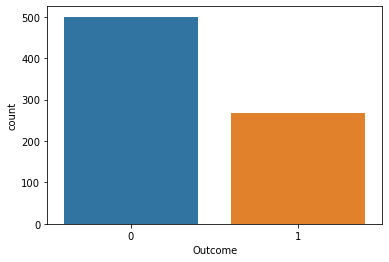

In [25]:
import seaborn as sns

sns.countplot(diabetes['Outcome'],label="Count")
print("Table of Diabetes Ratio")

In [26]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
 10  CalorieIntake             753 non-null    float64
 11  Exercise                  768 non-null    object 
 12  SleepDuration             768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [59]:
#DECISION TREE METHOD

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [35]:
#Accuracy on training set: 1.000
#Accuracy on test set: 0.714

In [38]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [36]:
#Accuracy on training set: 0.773
#Accuracy on test set: 0.740

In [39]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [34]:
Feature importances:
[ 0.04554275  0.6830362   0.          0.          0.          0.27142106
  0.          0.        ]
#We can then visualize the feature importances.

In [40]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [41]:
#SVM - SUPPORT VECTOR MACHINE

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [43]:
#Accuracy on training set: 1.00
#Accuracy on test set: 0.65
#The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set. SVM requires all the features to vary on a similar scale.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

In [45]:
#Accuracy on training set: 0.77
#Accuracy on test set: 0.77
#Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [46]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [47]:
#Accuracy on training set: 0.790
#Accuracy on test set: 0.797
#Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.